In [3]:
import pyodbc
import pandas as pd

# Connect to SQL Server using Windows Authentication
server = r'DESKTOP-1FFIFH5\SQLEXPRESS'
database = 'walmat'

conn_str = (
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    fr'SERVER={server};'
    fr'DATABASE={database};'
    r'Trusted_Connection=yes;'
)

conn = pyodbc.connect(conn_str)

# Example: list all tables in the database
#df_tables = pd.read_sql("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE='BASE TABLE'", conn)
#print("Tables in walmat DB:")
#print(df_tables)

# Optional: query a table
# Replace 'YourTableName' with an actual table name
# df = pd.read_sql("SELECT TOP 10 * FROM YourTableName", conn)
# print(df.head())

#conn.close()


In [11]:
query = "SELECT TOP 10 * FROM Walmart_customer_purchases"
df = pd.read_sql(query, conn)
df.head(10)


C:\Users\Home\AppData\Local\Temp\ipykernel_2964\1592785263.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.259995,Cash on Delivery,False,1,True
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.190002,Debit Card,True,1,False
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.620003,Credit Card,True,1,False
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.320007,Credit Card,False,2,True
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.279999,Credit Card,True,2,True
5,fdf82943-1b5f-4e0a-bf42-9a8e2035924e,59,Female,North Josemouth,Electronics,Laptop,2024-02-15,435.480011,Cash on Delivery,False,3,False
6,582e8439-2b9b-46bd-93ff-71d610f455cc,47,Male,Johnsonton,Beauty,Perfume,2024-12-19,231.039993,Debit Card,False,4,True
7,664555b7-7fd7-44a8-b4da-ec00230381b9,23,Other,Hoffmanmouth,Home,Sofa Cover,2024-09-28,240.910004,Cash on Delivery,False,2,False
8,a8e37b6a-d34c-4d21-84fc-ef713d4859be,60,Female,South Billyberg,Beauty,Shampoo,2025-01-30,179.759995,UPI,True,5,True
9,fa3bfd3a-99a4-41c7-bebc-8b04dc4c95f7,52,Female,North Katherinemouth,Home,Cookware,2024-12-23,463.429993,Cash on Delivery,True,3,False


In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas.io.sql")


In [34]:
# Basic info about the data
print(df.shape)  # rows x columns
print(df.columns)  # list of column names
print(df.dtypes)  # data types

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Preview the data
df.head()


(10, 13)
Index(['Customer_ID', 'Age', 'Gender', 'City', 'Category', 'Product_Name',
       'Purchase_Date', 'Purchase_Amount', 'Payment_Method',
       'Discount_Applied', 'Rating', 'Repeat_Customer', 'Age_Group'],
      dtype='object')
Customer_ID                 object
Age                          int64
Gender                      object
City                        object
Category                    object
Product_Name                object
Purchase_Date       datetime64[ns]
Purchase_Amount            float64
Payment_Method              object
Discount_Applied              bool
Rating                       int64
Repeat_Customer               bool
Age_Group                 category
dtype: object

Missing values:
Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
Age_Group    

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,Age_Group
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.259995,Cash on Delivery,False,1,True,46–60
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.190002,Debit Card,True,1,False,36–45
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.620003,Credit Card,True,1,False,46–60
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.320007,Credit Card,False,2,True,46–60
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.279999,Credit Card,True,2,True,36–45


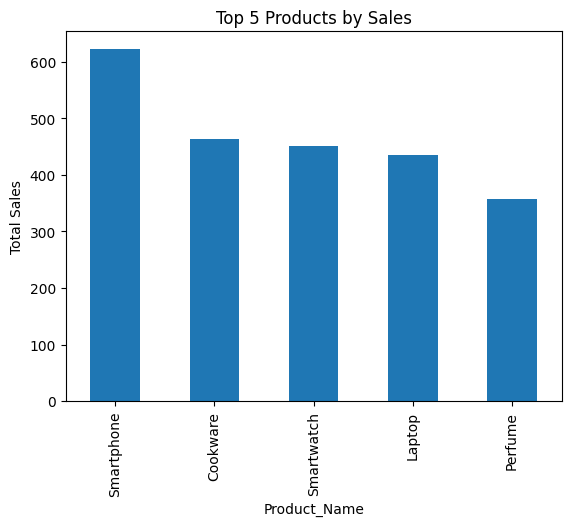

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Top 5 products by sales
top_products = df.groupby('Product_Name')['Purchase_Amount'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', title='Top 5 Products by Sales')
plt.ylabel("Total Sales")
plt.show()


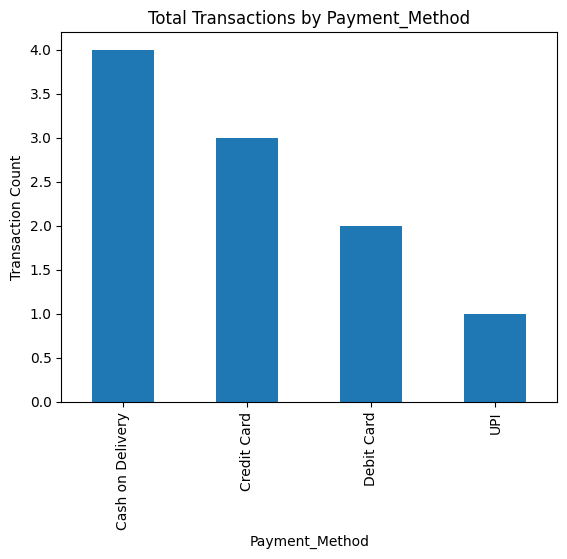

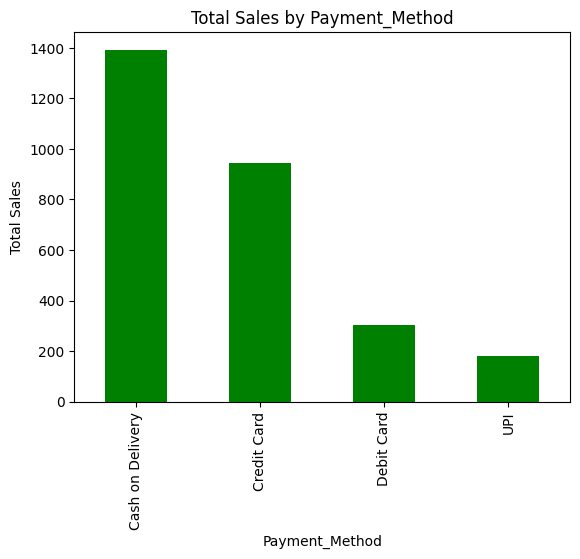

In [14]:
# Total transactions by payment method
payment_counts = df['Payment_Method'].value_counts()
payment_counts.plot(kind='bar', title='Total Transactions by Payment_Method')
plt.xlabel("Payment_Method")
plt.ylabel("Transaction Count")
plt.show()

# Total sales by payment method
payment_sales = df.groupby('Payment_Method')['Purchase_Amount'].sum().sort_values(ascending=False)
payment_sales.plot(kind='bar', title='Total Sales by Payment_Method', color='green')
plt.xlabel("Payment_Method")
plt.ylabel("Total Sales")
plt.show()


In [19]:
# Group by Product and calculate average rating
product_ratings = df.groupby('Product_Name')['Rating'].mean().sort_values(ascending=False)


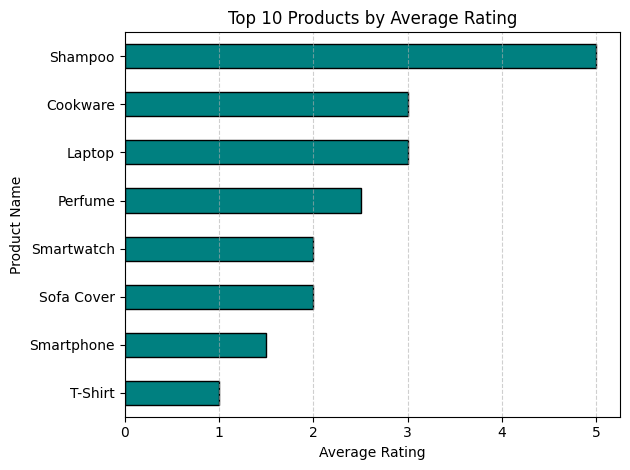

In [20]:
import matplotlib.pyplot as plt

# Plot top 10 products with highest average rating
top_n = 10
product_ratings.head(top_n).plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel("Average Rating")
plt.ylabel("Product Name")
plt.title(f"Top {top_n} Products by Average Rating")
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


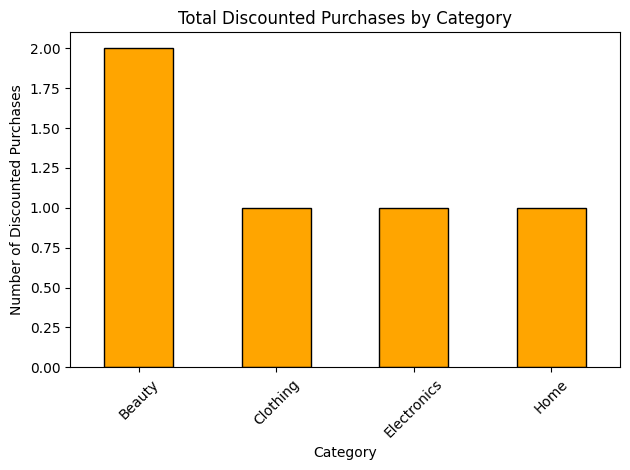

In [25]:
discounted_df = df[df['Discount_Applied'] > 0]  # Only rows where a discount was applied

category_discount_counts = discounted_df['Category'].value_counts()

# Plot
category_discount_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Total Discounted Purchases by Category")
plt.xlabel("Category")
plt.ylabel("Number of Discounted Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])  # use your actual date column name
